In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_labels = pd.read_csv("datos/train_labels.csv")
train_values = pd.read_csv("datos/train_values.csv")
building_age = train_values.loc[:,['building_id' , 'age']]
damage_age = building_age.merge(train_labels)

In [9]:
material_adobe = train_values['has_superstructure_adobe_mud'] == 1
adobe_persistance = damage_age[material_adobe]

In [10]:
grouped_by_age_adobe = adobe_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_adobe.columns.get_level_values(0)
level_1 = grouped_by_age_adobe.columns.get_level_values(1)
grouped_by_age_adobe.columns = level_0 + '_' + level_1
grouped_by_age_adobe.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count','damage_grade_mean':'adobe'}
grouped_by_age_adobe = grouped_by_age_adobe.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'adobe']
grouped_by_age_adobe = grouped_by_age_adobe[new_col_order]

In [11]:
material_mortar = train_values['has_superstructure_mud_mortar_stone'] == 1
mortar_persistance = damage_age[material_mortar]

In [12]:
grouped_by_age_mortar = mortar_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_mortar.columns.get_level_values(0)
level_1 = grouped_by_age_mortar.columns.get_level_values(1)
grouped_by_age_mortar.columns = level_0 + '_' + level_1
grouped_by_age_mortar.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count', 'damage_grade_mean':'mortar'}
grouped_by_age_mortar = grouped_by_age_mortar.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'mortar']
grouped_by_age_mortar = grouped_by_age_mortar[new_col_order]

In [13]:
material_stone = train_values['has_superstructure_stone_flag'] == 1
stone_persistance = damage_age[material_stone]

In [14]:
grouped_by_age_stone = stone_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_stone.columns.get_level_values(0)
level_1 = grouped_by_age_stone.columns.get_level_values(1)
grouped_by_age_stone.columns = level_0 + '_' + level_1
grouped_by_age_stone.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count','damage_grade_mean':'stone'}
grouped_by_age_stone = grouped_by_age_stone.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'stone']
grouped_by_age_stone = grouped_by_age_stone[new_col_order]

In [15]:
material_cement_mortar = train_values['has_superstructure_cement_mortar_stone'] == 1
cement_mortar_persistance = damage_age[material_cement_mortar]

In [16]:
grouped_by_age_cemento = cement_mortar_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_cemento.columns.get_level_values(0)
level_1 = grouped_by_age_cemento.columns.get_level_values(1)
grouped_by_age_cemento.columns = level_0 + '_' + level_1
grouped_by_age_cemento.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count', 'damage_grade_mean':'cement'}
grouped_by_age_cemento = grouped_by_age_cemento.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'cement']
grouped_by_age_cemento = grouped_by_age_cemento[new_col_order]

In [17]:
material_mud_brick = train_values['has_superstructure_mud_mortar_brick'] == 1
mud_brick_persistance = damage_age[material_mud_brick]

In [18]:
grouped_by_age_mud_brick = mud_brick_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_mud_brick.columns.get_level_values(0)
level_1 = grouped_by_age_mud_brick.columns.get_level_values(1)
grouped_by_age_mud_brick.columns = level_0 + '_' + level_1
grouped_by_age_mud_brick.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count', 'damage_grade_mean':'mud_brick'}
grouped_by_age_mud_brick = grouped_by_age_mud_brick.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'mud_brick']
grouped_by_age_mud_brick = grouped_by_age_mud_brick[new_col_order]

In [19]:
material_cement_brick = train_values['has_superstructure_cement_mortar_brick'] == 1
cement_brick_persistance = damage_age[material_cement_brick]

In [20]:
grouped_by_age_cement_brick = cement_brick_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_cement_brick.columns.get_level_values(0)
level_1 = grouped_by_age_cement_brick.columns.get_level_values(1)
grouped_by_age_cement_brick.columns = level_0 + '_' + level_1
grouped_by_age_cement_brick.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count', 'damage_grade_mean':'cement_brick'}
grouped_by_age_cement_brick = grouped_by_age_cement_brick.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'cement_brick']
grouped_by_age_cement_brick = grouped_by_age_cement_brick[new_col_order]

In [21]:
material_timber = train_values['has_superstructure_timber'] == 1
timber_persistance = damage_age[material_timber]

In [22]:
grouped_by_age_timber = timber_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_timber.columns.get_level_values(0)
level_1 = grouped_by_age_timber.columns.get_level_values(1)
grouped_by_age_timber.columns = level_0 + '_' + level_1
grouped_by_age_timber.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count', 'damage_grade_mean':'timber'}
grouped_by_age_timber = grouped_by_age_timber.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'timber']
grouped_by_age_timber = grouped_by_age_timber[new_col_order]

In [23]:
material_bamboo = train_values['has_superstructure_bamboo'] == 1
bamboo_persistance = damage_age[material_bamboo]

In [24]:
grouped_by_age_bamboo = bamboo_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_bamboo.columns.get_level_values(0)
level_1 = grouped_by_age_bamboo.columns.get_level_values(1)
grouped_by_age_bamboo.columns = level_0 + '_' + level_1
grouped_by_age_bamboo.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count','damage_grade_mean':'bamboo'}
grouped_by_age_bamboo = grouped_by_age_bamboo.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'bamboo']
grouped_by_age_bamboo = grouped_by_age_bamboo[new_col_order]

In [25]:
material_rc_non_eng = train_values['has_superstructure_rc_non_engineered'] == 1
rc_non_eng_persistance = damage_age[material_rc_non_eng]

In [26]:
grouped_by_age_non_eng = rc_non_eng_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_non_eng.columns.get_level_values(0)
level_1 = grouped_by_age_non_eng.columns.get_level_values(1)
grouped_by_age_non_eng.columns = level_0 + '_' + level_1
grouped_by_age_non_eng.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count','damage_grade_mean':'non_engineered'}
grouped_by_age_non_eng = grouped_by_age_non_eng.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'non_engineered']
grouped_by_age_non_eng = grouped_by_age_non_eng[new_col_order]

In [27]:
material_rc_eng = train_values['has_superstructure_rc_engineered'] == 1
rc_eng_persistance = damage_age[material_rc_eng]

In [28]:
grouped_by_age_eng = rc_eng_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_eng.columns.get_level_values(0)
level_1 = grouped_by_age_eng.columns.get_level_values(1)
grouped_by_age_eng.columns = level_0 + '_' + level_1
grouped_by_age_eng.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count','damage_grade_mean':'engineered'}
grouped_by_age_eng= grouped_by_age_eng.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'engineered']
grouped_by_age_eng = grouped_by_age_eng[new_col_order]

In [29]:
material_other = train_values['has_superstructure_other'] == 1
other_persistance = damage_age[material_other]

In [30]:
grouped_by_age_other = other_persistance.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age_other.columns.get_level_values(0)
level_1 = grouped_by_age_other.columns.get_level_values(1)
grouped_by_age_other.columns = level_0 + '_' + level_1
grouped_by_age_other.reset_index(inplace = True)
col_rename = {'damage_grade_count':'houses_count','damage_grade_mean':'other'}
grouped_by_age_other = grouped_by_age_other.rename(columns = col_rename)
new_col_order = ['age', 'houses_count', 'other']
grouped_by_age_other = grouped_by_age_other[new_col_order]

<AxesSubplot:xlabel='age'>

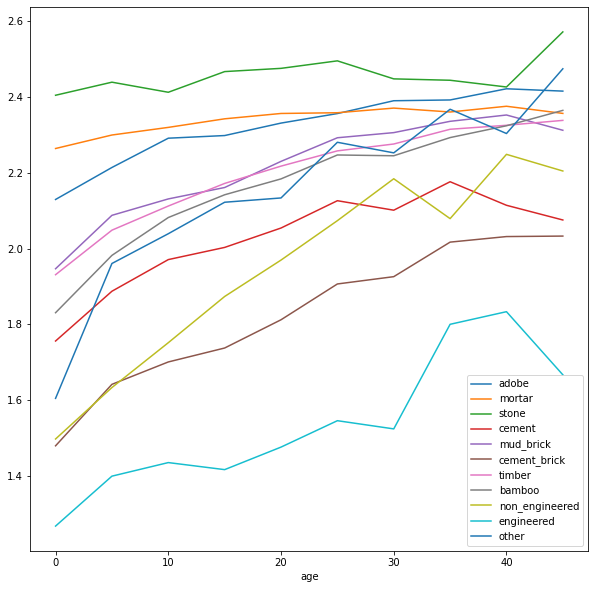

In [31]:
##adobe_y_mortar
x1 = grouped_by_age_adobe[['age','adobe']]
x2 = grouped_by_age_mortar[['age','mortar']]
x3 = grouped_by_age_stone[['age','stone']]
x4 = grouped_by_age_cemento[['age','cement']]
x5 = grouped_by_age_mud_brick[['age','mud_brick']]
x6 = grouped_by_age_cement_brick[['age','cement_brick']]
x7 = grouped_by_age_timber[['age','timber']]
x8 = grouped_by_age_bamboo[['age','bamboo']]
x9 = grouped_by_age_non_eng[['age','non_engineered']]
x10 = grouped_by_age_eng[['age','engineered']]
x11 = grouped_by_age_other[['age','other']]
lista = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]
tabla = pd.merge(x1.head(10),x2.head(10),on='age')
for i in range(2,len(lista)):
    tabla = pd.merge(tabla,lista[i].head(10),on='age')
tabla.set_index('age').head(10).plot(legend=True,figsize=(10,10))